#### Currently, the 29th image's bounding boxes are plotted. Next steps:
1. select salt domes and faults out of the dataframe
2. how to crop the labels to the same size. 

In [11]:
import json
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.spatial import ConvexHull
import requests
!pip install pysftp

Populating the interactive namespace from numpy and matplotlib


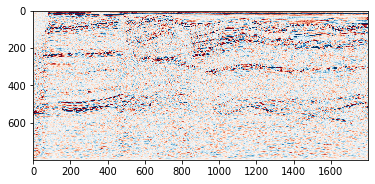

In [23]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img=mpimg.imread('C:/Users/Tsaip/1.png')
imgplot = plt.imshow(img)
plt.show()

In [157]:
path = 'Seismic Traps - Public Datasets.json'
pd_data = pd.read_json(path, lines=True)

# for line in open(path, 'r'):
#     boxData.append(json.loads(line))
print(len(pd_data['annotation'][27])) # print how many bounding boxes(labels) are there in this sample
print(pd_data['annotation'][27])
image28 = pd.DataFrame(pd_data['annotation'][27])

image28.head()
print()

image28_box = np.array([np.array(box) for box in image28['points']]) # make the dounding boxes into ndarray
# image28_box = np.array(image28['points'][0])
nn = 29
print('There are  %i bounding boxes in image %i: \n'%(len(image28['points']),nn), image28_box) 
for i in range(len(image28['points'])):
    image28_box[i][:,0] *= image28['imageWidth'][i]
    image28_box[i][:,1] *= image28['imageHeight'][i]
    
# image28_box[:,0] *= image28['imageWidth'][0]
# image28_box[:,1] *= image28['imageHeight'][0]
print('\n Transformed coordination: \n', image28_box)
# print('I have %d %s' %(a,b))
# for i in range(len(pd_data.index)):
#     print(pd_data['annotation'][i])

3
[{'label': ['Channel'], 'shape': 'rectangle', 'points': [[0.259745329600224, 0.11889434508193701], [0.382579404900154, 0.11889434508193701], [0.382579404900154, 0.160309555095451], [0.259745329600224, 0.160309555095451]], 'notes': '', 'imageWidth': 1800, 'imageHeight': 800}, {'label': ['Channel'], 'shape': 'rectangle', 'points': [[0.22619762270463903, 0.174499840145957], [0.29099381670857305, 0.174499840145957], [0.29099381670857305, 0.18976028244009002], [0.22619762270463903, 0.18976028244009002]], 'notes': '', 'imageWidth': 1800, 'imageHeight': 800}, {'label': ['Channel'], 'shape': 'rectangle', 'points': [[0.15945595270861102, 0.188159693018272], [0.195655809082105, 0.188159693018272], [0.195655809082105, 0.19850250912498402], [0.15945595270861102, 0.19850250912498402]], 'notes': '', 'imageWidth': 1800, 'imageHeight': 800}]

There are  3 bounding boxes in image 29: 
 [[[0.25974533 0.11889435]
  [0.3825794  0.11889435]
  [0.3825794  0.16030956]
  [0.25974533 0.16030956]]

 [[0.22619

<class 'scipy.spatial.qhull.ConvexHull'>


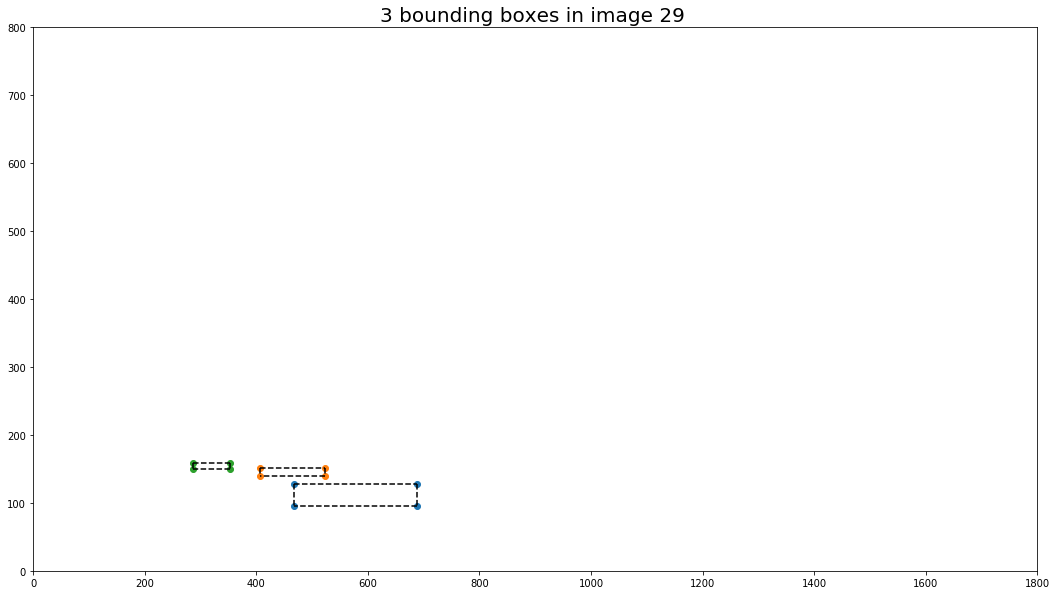

In [161]:
# minX, minY = image28_box[0,:]
# width = abs(image28_box[1,0]-image28_box[0,0])
# height = abs(image28_box[2,1]-image28_box[1,1])
# currentAxis = plt.gca()
# currentAxis.add_patch(Rectangle((minX, minY), width = width, height = height, facecolor="grey", linewidth=1,
#         fill=False))

image28_hulls = np.array([ConvexHull(a) for a in image28_box])
print(type(image28_hulls[0]))
# Plot bounding boxes in the image
fig, ax = plt.subplots(figsize=(18, 10))
ax.set_xlim(xmin=0, xmax=1800)
ax.set_ylim(ymin=0, ymax=800)
ax.set_title('%i bounding boxes in image %i '%(len(image28['points']), nn), fontsize=20)
for i in range(len(image28['points'])):
#     plt.plot(image28_box[i][:,0], image28_box[i][:,1], 'o')
    ax.plot(image28_box[i][:,0], image28_box[i][:,1], 'o')
    for simplex in image28_hulls[i].simplices:
#         plt.plot(image28_box[i][simplex, 0], image28_box[i][simplex, 1], 'k--')
        ax.plot(image28_box[i][simplex, 0], image28_box[i][simplex, 1], 'k--')

In [144]:
image28_box[0][:,0]

array([4.67541593e+02, 3.06063524e+02, 3.82579405e-01, 2.59745330e-01])